# Introduction 
This notebook features dataset from the Don't Overfit! II  competition, which focused on developing an algorithm that uses no preprocessing, instead focusing on model construction to achieve the highest score.

# Data Preprocessing 
The data comes from a mysterious source and features many variables. Other notebooks suggested that not all the variables were needed, since there were 150 of them. Removing some of the variables may help with the overfitting problem. First we load in the data and libraries and split into a train and test dataset:

In [43]:
library(caret)
library(tidyverse)
library(varImp)
library(randomForest)
library(caretEnsemble)
library(glmnet)
library(Matrix)

In [44]:
data <- read.csv("../input/older-dataset-for-dont-overfit-ii-challenge/train.csv")
data <- data.frame(data)
data$ID_code <- NULL

# split into train and test
smp_size <- floor(0.75 * nrow(data))
set.seed(123)
train_ind <- sample(seq_len(nrow(data)), size = smp_size)
train <- data[train_ind, ]
test <- data[-train_ind, ]

head(train)

,id,target,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
159,158,0,0.424,0.189,-1.587,-0.647,0.027,1.076,0.362,-0.263,⋯,-0.017,-0.428,0.673,-0.658,1.061,1.865,0.165,0.084,0.136,0.209
207,206,1,-0.296,-0.511,-0.285,0.433,-0.598,-1.061,-0.148,-1.239,⋯,-0.281,-0.834,0.582,-1.392,-2.076,-1.048,-0.523,-1.384,-0.375,0.179
179,178,0,-0.032,0.367,2.036,-0.692,1.179,-2.493,-0.365,-0.439,⋯,-0.552,2.641,-0.772,0.231,0.936,0.061,0.246,-0.225,0.761,-1.443
14,13,0,-0.378,0.326,1.526,-0.955,0.395,0.704,-0.566,-1.443,⋯,0.537,0.581,0.006,0.545,-0.287,-0.100,1.163,1.260,-1.011,1.454
195,194,0,0.818,0.966,-1.087,0.199,-0.864,1.003,-0.210,-0.379,⋯,2.865,-0.862,-0.823,-0.379,-0.347,0.313,-0.496,-0.731,0.533,0.480
170,169,0,-1.615,-0.525,0.724,-0.012,0.575,-0.325,0.399,1.042,⋯,0.817,0.542,0.776,0.408,0.992,-0.896,2.334,-0.045,-0.091,0.645


In [45]:
ytrain = as.vector(train$target)
train$target = NULL
ytest = as.vector(test$target)
test$target = NULL
xtrain = as.matrix(train)
xtest  = as.matrix(test)

# Data Cleaning: Variable Selection 
The data contains too many variables and is likely overfitting, we will use a lasso and glm model to select the most important.

In [46]:
set.seed(123)
cv.glmmod <- cv.glmnet(xtrain, ytrain, alpha=1, family = "binomial")
best.lambda <- cv.glmmod$lambda.min
glmmod <- glmnet(xtrain, ytrain, alpha=1, lambda = best.lambda, family = "binomial")
coefs <- coef(glmmod)[,1]
coefs <- sort(abs(coefs), decreasing = F)
coefs
library(ROCR)
yhat_glm <- predict(glmmod, s=best.lambda, xtest, type="response")
pred1 <- prediction(yhat_glm, ytest)
perf <- performance(pred1, measure = "auc")
print(perf@y.values)

X0           X1           X2           X3           X4           X5 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
          X6           X7           X8           X9          X10          X11 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X12          X14          X15          X17          X18          X19 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X20          X21          X22          X23          X24          X26 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X27          X28          X29          X31          X32          X34 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X35          X36          X37          X38          X39          X40 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X41          X42          X44          X45          X46          X47 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X48          X49          X50          X51          X52          X53 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X54          X55          X56          X57          X58          X59 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X60          X61          X62          X63          X64          X66 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X67          X68          X69          X70          X71          X74 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X75          X76          X77          X78          X79          X81 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X83          X84          X86          X87          X88          X89 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X92          X93          X94          X96          X97          X98 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         X99         X100         X102         X103         X104         X105 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X106         X107         X108         X109         X110         X111 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X112         X113         X114         X115         X116         X118 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X119         X120         X121         X122         X123         X124 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X125         X126         X128         X131         X132         X135 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X136         X137         X138         X139         X140         X141 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X142         X143         X144         X146         X148         X150 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X151         X152         X153         X154         X155         X157 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X158         X159         X160         X161         X162         X164 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X166         X167         X168         X169         X170         X171 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X172         X173         X174         X175         X176         X177 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
        X178         X179         X180         X182         

[[1]]
[1] 0.8619565



Since the variables are sorted, we can choose the threshold at which we wnat to keep the variables. I ran the model with lower and lower thresholds, arriving at 12 variables to have the best solution.

In [47]:
ID <- 'id'
TARGET <- 'target'

train <- read.csv('../input/older-dataset-for-dont-overfit-ii-challenge/train.csv')
test <- read.csv('../input/older-dataset-for-dont-overfit-ii-challenge/test.csv')
train$mean_ = apply(train[, !names(train) %in% c(ID, TARGET)], 1, function(x) mean(x))
test$mean_ = apply(test[, !names(test) %in% c(ID, TARGET)], 1, function(x) mean(x))

train$mean_

var_selected <- c("X33", "X217", "X65", "X91", "X199", "X73", "X189",
                  "X133", "X194", "X117", "X252", "X16")

train_matrix <- Matrix(as.matrix(train[, var_selected]), sparse = TRUE)
test_matrix <- Matrix(as.matrix(test[, var_selected]), sparse = TRUE)

[1] -0.0092233333  0.0861300000  0.0276566667  0.0883566667  0.1344133333
  [6] -0.0456566667  0.0550766667 -0.0543300000 -0.0536466667  0.0893200000
 [11]  0.0628933333  0.0567466667 -0.0105600000  0.0249966667  0.0324733333
 [16] -0.0289933333  0.0009200000  0.0471433333 -0.0250733333 -0.0415700000
 [21]  0.0552866667  0.0174100000  0.0153233333 -0.0123366667  0.0625300000
 [26]  0.0605500000 -0.0162866667 -0.0462866667 -0.0624866667 -0.0353600000
 [31] -0.0408633333  0.0135966667  0.0260300000  0.0629500000  0.0615800000
 [36]  0.0639466667  0.0431666667 -0.0399133333  0.0284000000 -0.0757600000
 [41]  0.0011066667 -0.0578100000 -0.0610000000  0.0023066667 -0.0862700000
 [46]  0.0614600000  0.0379566667  0.0267633333 -0.0034100000 -0.0627066667
 [51] -0.0500266667  0.0221566667 -0.0340133333 -0.0886766667  0.0620500000
 [56] -0.0296733333 -0.0320733333  0.0408966667  0.0378200000  0.0367266667
 [61] -0.0914833333  0.0343066667  0.0804933333  0.0486600000 -0.1249333333
 [66] -0.1443466667 -0.0235666667 -0.0097100000  0.0056000000  0.0980966667
 [71]  0.0410233333  0.0242500000 -0.1408366667 -0.1215966667  0.0430066667
 [76] -0.0121600000  0.0144066667 -0.0048700000 -0.0118600000  0.1079666667
 [81]  0.0308400000  0.0399700000 -0.0176766667  0.0444933333  0.0417033333
 [86]  0.0909533333 -0.0011133333 -0.0503866667 -0.0449566667  0.0356433333
 [91]  0.0240566667  0.0456833333  0.0477033333  0.1073533333 -0.0044933333
 [96] -0.0138933333 -0.0368700000 -0.0650866667 -0.0465266667  0.0254066667
[101] -0.0583500000  0.0504866667  0.1090400000 -0.0972400000 -0.0445933333
[106]  0.0775466667 -0.0155966667  0.0014533333  0.0006333333 -0.0224966667
[111] -0.0119433333 -0.0152133333 -0.0035133333 -0.0547033333 -0.0292000000
[116]  0.0639200000 -0.1290866667  0.0756333333 -0.0525133333 -0.0943000000
[121]  0.0309966667 -0.1284166667  0.0093500000  0.0266600000 -0.0180266667
[126] -0.0710600000  0.0732366667  0.0454533333 -0.0073633333  0.1610333333
[131]  0.0265666667 -0.0930833333  0.0371300000 -0.0222600000 -0.0135233333
[136]  0.0106966667 -0.1133833333  0.0154866667 -0.0721100000  0.0746800000
[141]  0.0130200000  0.0140166667  0.0343933333  0.0993966667  0.0191500000
[146]  0.0461733333 -0.1384000000 -0.0942400000 -0.0862033333 -0.0260133333
[151]  0.0987700000 -0.0688900000 -0.0540033333  0.0129200000  0.0253300000
[156] -0.0854000000  0.0040066667  0.0471033333 -0.0343466667 -0.0597900000
[161] -0.0210400000  0.0249500000  0.0337733333 -0.0119133333 -0.0537433333
[166] -0.0385733333 -0.0378300000  0.0180366667  0.0673666667 -0.0291100000
[171] -0.0052333333 -0.0951400000  0.1319000000  0.0565500000  0.1193233333
[176] -0.1114100000 -0.0528333333 -0.0590466667  0.0340000000 -0.0249566667
[181]  0.0629533333 -0.0297233333 -0.0030066667  0.0002900000  0.0658033333
[186]  0.0785633333 -0.0196833333  0.0663466667  0.0088300000  0.0924700000
[191] -0.0704666667  0.0850633333 -0.0241600000  0.0423600000  0.0687100000
[196] -0.0010233333  0.0084366667 -0.0487000000  0.1115633333 -0.0465633333
[201] -0.0320133333  0.0347366667 -0.0561133333 -0.1369966667 -0.0192366667
[206] -0.1331600000 -0.0082800000  0.1120066667  0.0190666667 -0.0178666667
[211] -0.0019266667 -0.0541100000  0.0186200000  0.0375700000 -0.0833500000
[216]  0.1505033333  0.0266133333 -0.0170300000  0.0883600000  0.0329633333
[221] -0.0468200000 -0.0800866667  0.1041433333 -0.0931833333 -0.1293066667
[226] -0.0300933333 -0.0777933333  0.0127433333 -0.0483300000 -0.0339033333
[231] -0.0157600000 -0.0318900000 -0.1273400000 -0.0617966667 -0.0065833333
[236] -0.0538800000  0.0330600000 -0.0917166667 -0.0100366667  0.1012266667
[241] -0.0087700000  0.0303266667  0.0078500000  0.1509066667  0.0262233333
[246] -0.0222333333  0.0178200000 -0.0872366667  0.0365700000  0.0307300000

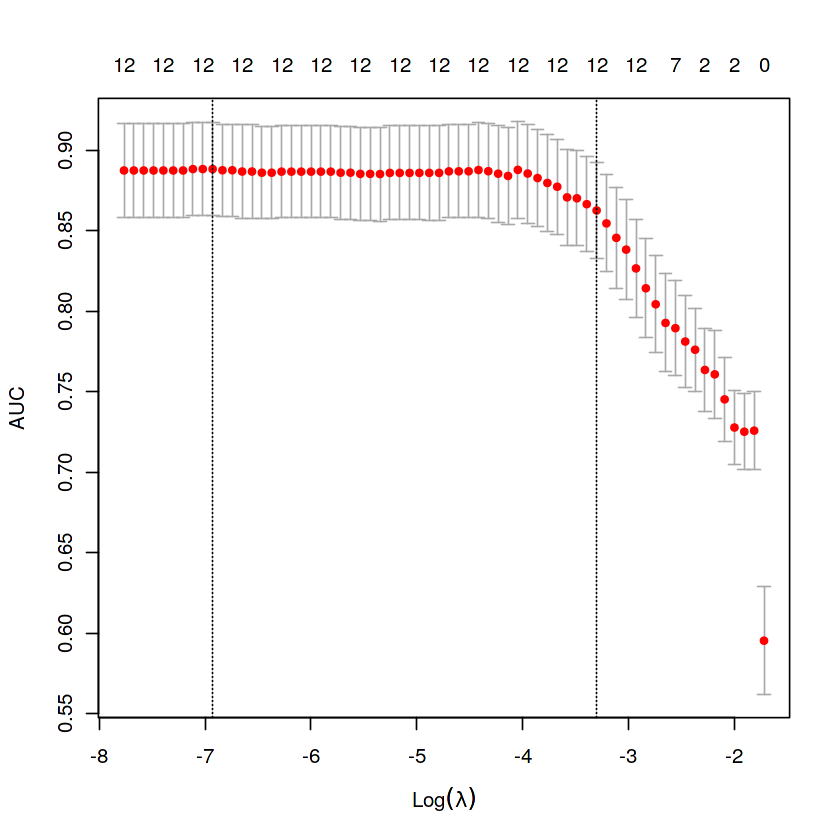

In [48]:
set.seed(123456)
glmnet_model <- cv.glmnet(x = train_matrix,
                          y = as.factor(train[,TARGET]),
                          alpha = 1,
                          family = 'binomial',
                          type.measure = 'auc')

plot(glmnet_model)

var,coef
<fct>,<dbl>
(Intercept),0.82412851
X33,0.66619052
X217,-0.34736399
X65,0.53258861
X91,-0.29850185
X199,0.22788396
X73,-0.23260077
X189,-0.17107014
X133,-0.09192426


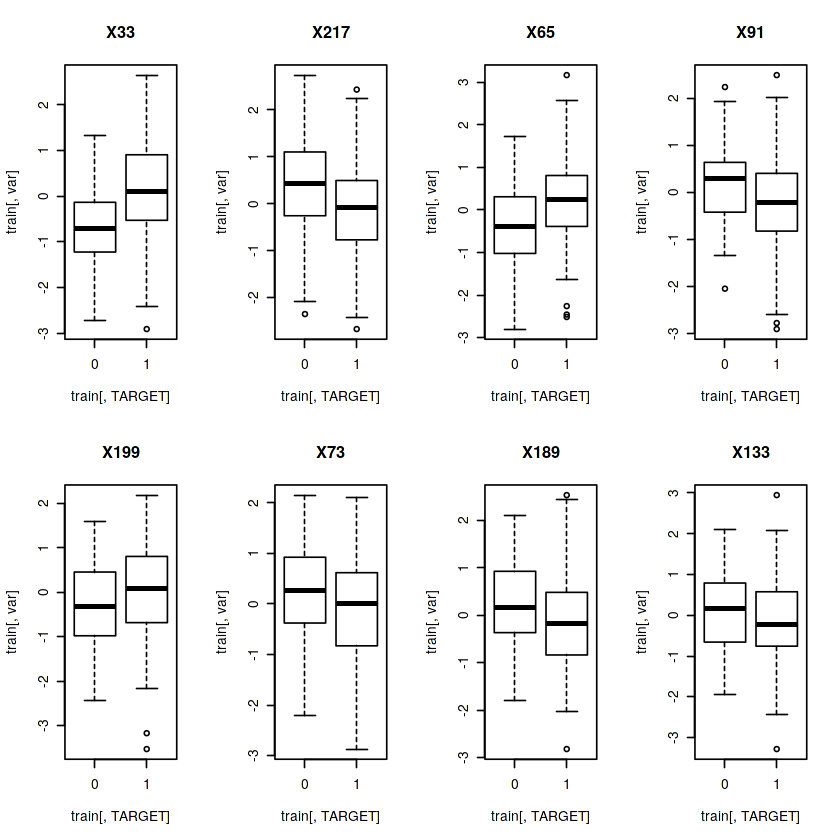

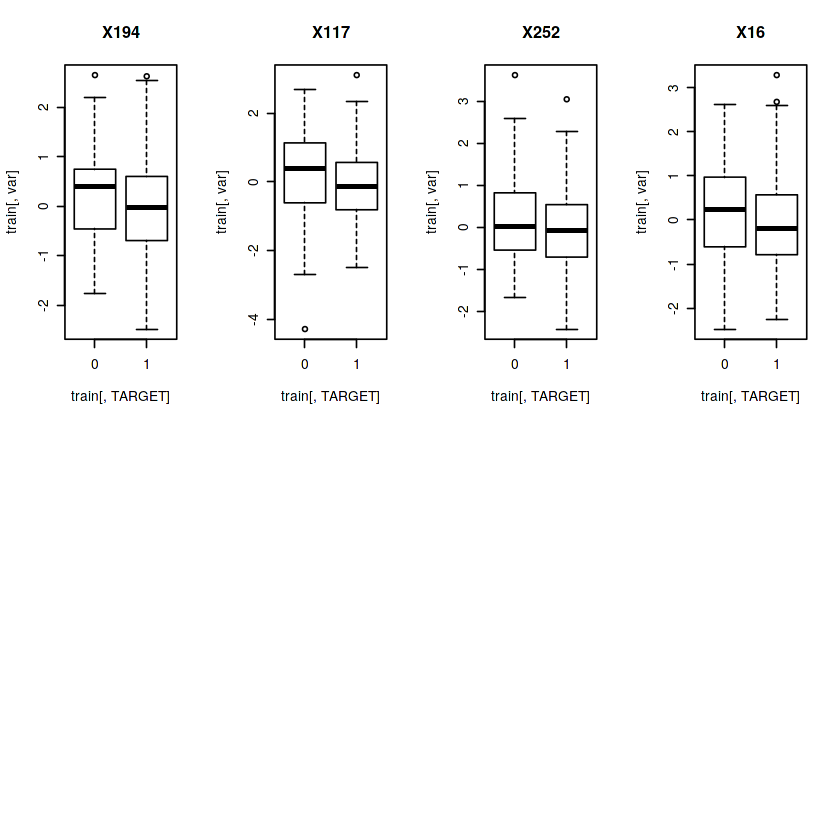

In [49]:
coef_var = as.data.frame(as.matrix(coef(glmnet_model)))

var_importance = data.frame(var = row.names(coef_var)[coef_var != 0],
                           coef = coef_var[coef_var != 0])

var_importance

par(mfrow=c(2,4))
for(var in var_importance$var){
  if (var != '(Intercept)'){
    boxplot(train[,var] ~ train[,TARGET], main=var)
  }
}


In [50]:
pred_test <- predict(glmnet_model, test_matrix, type='response')

In [51]:
data_test <- data.frame(ID=test[,ID],
                        TARGET=pred_test)

names(data_test) <- c(ID, TARGET)

head(data_test)

write.csv(data_test, 'glsubmission.csv', row.names = FALSE)

,id,target
,<int>,<dbl>
1,250,0.8345202
2,251,0.6447477
3,252,0.7402393
4,253,0.8503419
5,254,0.5150061
6,255,0.3578153


# Submission
At this point, we are able to submit. Below is included some older data from models I tried to run, but none of them were very sucessful.

In [52]:
# load datasets
train <- read.csv('../input/older-dataset-for-dont-overfit-ii-challenge/train.csv')
test <- read.csv('../input/older-dataset-for-dont-overfit-ii-challenge/test.csv')

head(train)

,id,target,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,⋯,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
2,1,0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,⋯,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
3,2,1,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,⋯,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
4,3,1,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,⋯,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
5,4,1,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,⋯,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253
6,5,1,-0.641,-0.576,2.493,0.317,0.009,0.428,-1.887,2.412,⋯,-0.266,1.548,-0.523,0.923,0.021,-0.909,0.629,-2.386,0.265,0.549


In [53]:
# make target variable into factor
train$target <- as.factor(make.names(train$target))
class(train$target)

# separate independent and dependent variables
x <- train[,3:302]
y <- train[,2]


[1] "factor"

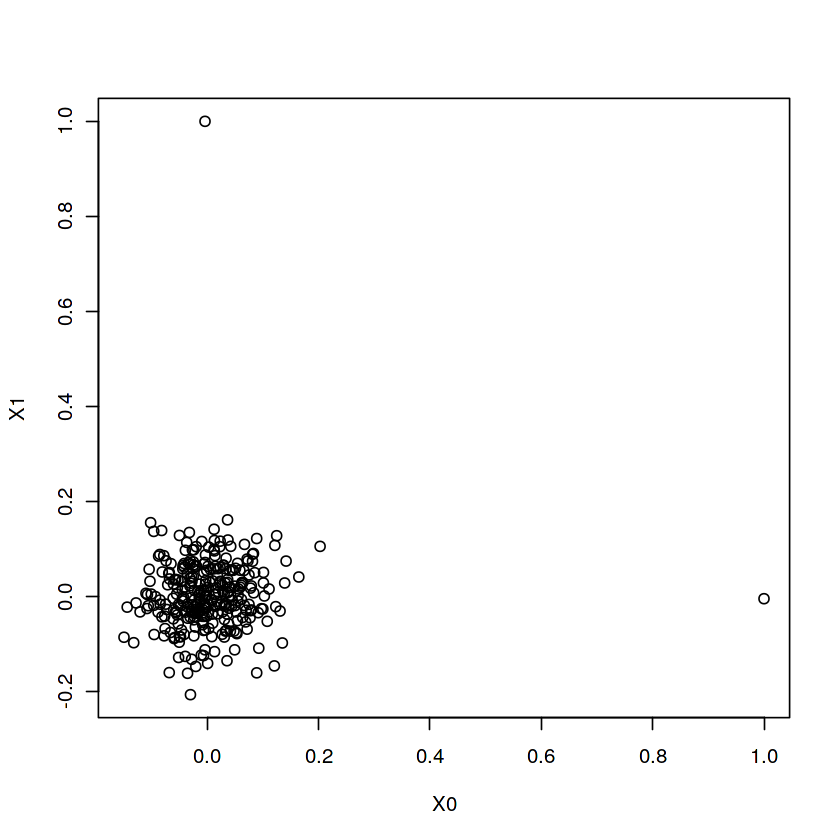

In [54]:
correlationMatrix <- cor(x)
plot(correlationMatrix)


In [ ]:
control <- trainControl(method="repeatedcv",
                        number=10,
                        repeats = 5,
                        classProbs = TRUE,
                        summaryFunction = twoClassSummary)
metric <- "ROC"

# Build models with different algorithms
# a) linear algorithms
set.seed(27)
fit.lda <- train(target~., data=train, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(27)
fit.cart <- train(target~., data=train, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(27)
fit.knn <- train(target~., data=train, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(27)
fit.svm <- train(target~., data=train, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(27)
fit.rf <- train(target~., data=train, method="rf", metric=metric, trControl=control)


Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning mess


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 50 

ROC 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.4583333 0.6041667 0.6875000 0.6719444 0.7569444 0.8680556    0
cart 0.3055556 0.5277778 0.6059028 0.6084028 0.7005208 0.8923611    0
knn  0.1527778 0.4756944 0.5572917 0.5538194 0.6137153 0.8576389    0
svm  0.4861111 0.7031250 0.7708333 0.7619444 0.8177083 0.9166667    0
rf   0.4861111 0.7022569 0.7430556 0.7413889 0.8055556 0.8819444    0

Sens 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.2222222 0.4444444 0.5555556 0.5355556 0.6666667 0.7777778    0
cart 0.0000000 0.2500000 0.3333333 0.3844444 0.5555556 0.7777778    0
knn  0.0000000 0.2222222 0.2222222 0.2577778 0.3333333 0.5555556    0
svm  0.1111111 0.3611111 0.4444444 0.4955556 0.5555556 0.8888889    0
rf   0.0000000 0.1111111 0.2222222 0.2266667 0.3333333 0.4444444    0

Spec 
       Min. 1st Qu.  Median    Mean  3

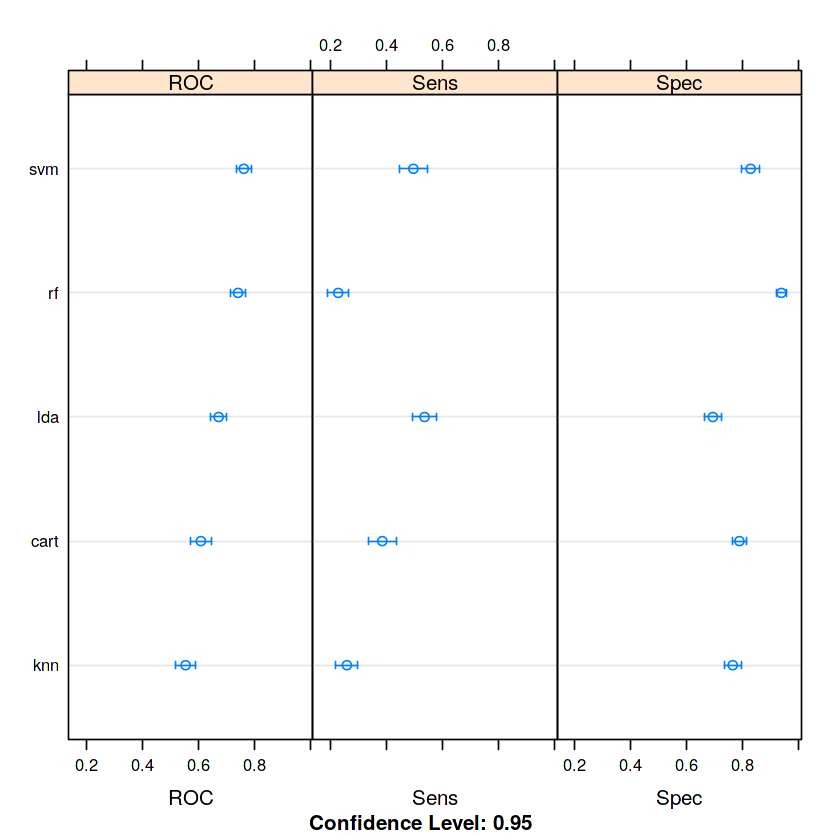

In [19]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)

dotplot(results)

In [20]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(train$target, p=0.70, list=FALSE)
# select 20% of the data for validation
validation <- train[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- train[validation_index,]

In [21]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

# a) linear algorithms
set.seed(7)
fit.lda <- train(target~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(target~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(target~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(target~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(target~., data=dataset, method="rf", metric=metric, trControl=control)

# summarize accuracy of models
results <- resamples(list(lda=fit.lda, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”



Call:
summary.resamples(object = results)

Models: lda, knn, svm, rf 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda 0.4117647 0.4941520 0.7058824 0.6297214 0.7222222 0.7647059    0
knn 0.4117647 0.5294118 0.5835913 0.5879601 0.6617647 0.7222222    0
svm 0.6111111 0.6354489 0.6470588 0.6402821 0.6470588 0.6666667    0
rf  0.5789474 0.6111111 0.6470588 0.6585483 0.6617647 0.8823529    0

Kappa 
          Min.    1st Qu.      Median       Mean   3rd Qu.      Max. NA's
lda -0.2878788 -0.1241210  0.30210647 0.18054920 0.4319672 0.4848485    0
knn -0.3934426 -0.1060656 -0.02206052 0.02703707 0.2443182 0.3661972    0
svm  0.0000000  0.0000000  0.00000000 0.00000000 0.0000000 0.0000000    0
rf  -0.1121495  0.0000000  0.07449360 0.12865157 0.1951892 0.7213115    0


Random Forest 

175 samples
301 predictors
  2 classes: 'X0', 'X1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 157, 156, 157, 158, 157, 158, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
    2   0.6402821  0.0000000
  151   0.6585483  0.1286516
  301   0.6412281  0.1190104

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 151.


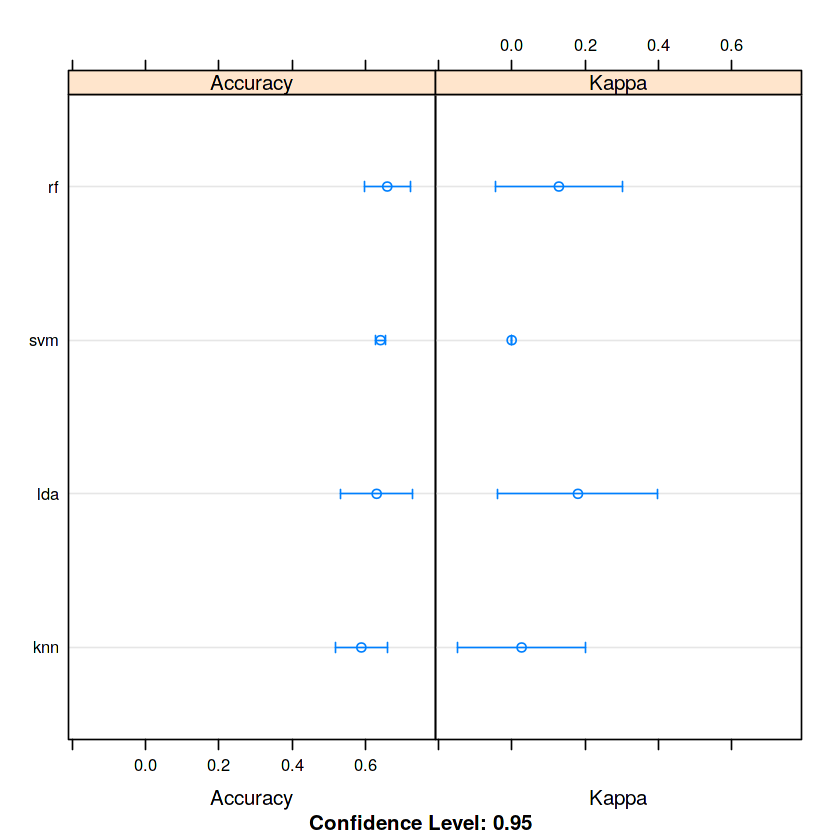

In [22]:
# compare accuracy of models
dotplot(results)

# summarize Best Model
print(fit.rf)


In [23]:
# estimate skill of RF on the validation dataset
predictions <- predict(fit.rf, validation)
confusionMatrix(predictions, validation$target)

predictions <- predict(fit.rf, test)
head(predictions)

Confusion Matrix and Statistics

          Reference
Prediction X0 X1
        X0  8  4
        X1 19 44
                                          
               Accuracy : 0.6933          
                 95% CI : (0.5762, 0.7947)
    No Information Rate : 0.64            
    P-Value [Acc > NIR] : 0.200896        
                                          
                  Kappa : 0.2424          
                                          
 Mcnemar's Test P-Value : 0.003509        
                                          
            Sensitivity : 0.2963          
            Specificity : 0.9167          
         Pos Pred Value : 0.6667          
         Neg Pred Value : 0.6984          
             Prevalence : 0.3600          
         Detection Rate : 0.1067          
   Detection Prevalence : 0.1600          
      Balanced Accuracy : 0.6065          
                                          
       'Positive' Class : X0              
                                    

[1] X1 X1 X1 X1 X1 X1
Levels: X0 X1

In [24]:
submission <- cbind(test$id, predictions)
submission <- as.data.frame(submission)
submission$predictions <- submission$predictions - 1
submission <- rename(submission, id = V1,
                     target = predictions)

write_csv(submission, "./mysubmission.csv")
